In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
#print(df)

In [3]:
#add space after printing function
def sprint(input):
    print('')
    print(input)

df['cnt'] = True

#Basic client data
client_data = df.iloc[:, np.r_[:7, 20, 21]]
print(client_data.head())

#Info on last contact of current campaign
last_contact = df.iloc[:, np.r_[7:11, 20, 21]]
sprint(last_contact.head())

#Other attributes
other_atbs = df.iloc[:, np.r_[11:15, 20, 21]]
sprint(other_atbs.head())

#Social and economic context
socec_ctxt = df.iloc[:, 15:22]
sprint(socec_ctxt.head())

   age        job  marital    education  default housing loan   y   cnt
0   56  housemaid  married     basic.4y       no      no   no  no  True
1   57   services  married  high.school  unknown      no   no  no  True
2   37   services  married  high.school       no     yes   no  no  True
3   40     admin.  married     basic.6y       no      no   no  no  True
4   56   services  married  high.school       no      no  yes  no  True

     contact month day_of_week  duration   y   cnt
0  telephone   may         mon       261  no  True
1  telephone   may         mon       149  no  True
2  telephone   may         mon       226  no  True
3  telephone   may         mon       151  no  True
4  telephone   may         mon       307  no  True

   campaign  pdays  previous     poutcome   y   cnt
0         1    999         0  nonexistent  no  True
1         1    999         0  nonexistent  no  True
2         1    999         0  nonexistent  no  True
3         1    999         0  nonexistent  no  True


FOLLOWING CODE ADDRESSED AN ERROR IN THE DATA THAT TURNED OUT TO BE IRRELEVANT

sprint(other_atbs.head())

pdays_in_nonex = other_atbs[other_atbs.poutcome == 'nonexistent'].pdays.unique()
print(pdays_in_nonex)

poutcomes_in_999 = other_atbs[other_atbs.pdays == 999].poutcome.unique()
print(poutcomes_in_999)

def correct_poutcome(row):
    if row.pdays == 999:
        return 'nonexistent'
    if row.poutcome == 'success':
        return 'success'
    else:
        return 'failure'
    
df['poutcome_corrected'] = df.apply(lambda row: correct_poutcome(row), axis=1)

pdays_in_nonex2 = df[df.poutcome_corrected == 'nonexistent'].pdays.unique()
sprint(pdays_in_nonex2)

poutcomes_in_9992 = df[df.pdays == 999].poutcome_corrected.unique()
print(poutcomes_in_9992)

#Update to other_atbs dataframe required to contain poutcome_corrected:

other_atbs_2 = df.iloc[:, np.r_[11:14, 21, 20]]
sprint(other_atbs_2.head())

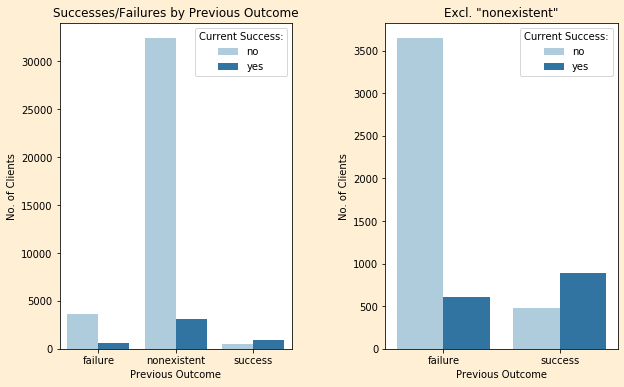

In [15]:
#print(len(other_atbs))

previous_current = df.groupby(['poutcome', 'y']).cnt.count().reset_index()
previous_current.columns = ['Previous Outcome','Current Success:','No. of Clients']
#print(previous_current)

pc_no_nonex = previous_current[previous_current['Previous Outcome'] != 'nonexistent']


fig = plt.figure(figsize=[10,6])
fig.patch.set_facecolor('papayawhip')
plt.subplots_adjust(wspace=0.4)
sns.set_palette("Paired")

ax = plt.subplot(1,2,1)
sns.barplot(data=previous_current, x="Previous Outcome", y="No. of Clients", hue="Current Success:")
plt.title('Successes/Failures by Previous Outcome')

ax2 = plt.subplot(1,2,2)
sns.barplot(data=pc_no_nonex, x="Previous Outcome", y="No. of Clients", hue="Current Success:")
plt.title('Excl. "nonexistent"')

plt.savefig('SF by Previous Outcome (Bar).png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

Out of 1373 successes in the last campagin, 894 telemarketing calls were successful in this campaign, a 65.0% success rate.
Out of 4252 failures in the last campagin, 605 telemarketing calls were successful in this campaign, a 14.0% success rate.
Out of 35563 unconnected calls in the last campagin, 3141 telemarketing calls were successful in this campaign, a 9.0% success rate.


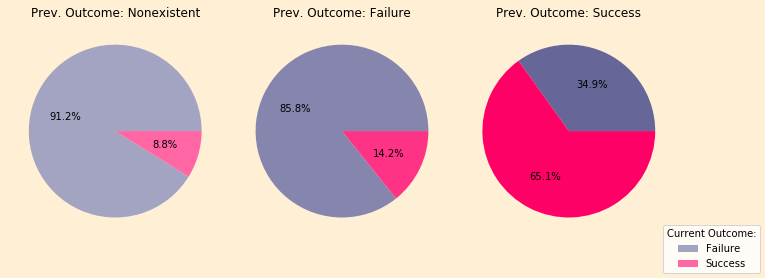

In [5]:
yes_and_nos = df.groupby('y').age.count().reset_index()
#print(yes_and_nos)

#out of those successful in previous campaign, how many successful in this campaign

previous_successes = other_atbs[other_atbs.poutcome == 'success']
ps_count = previous_successes.poutcome.count()
double_successes = previous_successes[previous_successes.y == 'yes']
ds_count = double_successes.y.count()
s_success_rate = round(100*float(ds_count)/ps_count)

print('Out of '+str(ps_count)+' successes in the last campagin, '+str(ds_count)+\
      ' telemarketing calls were successful in this campaign, a '+str(s_success_rate)+\
      '% success rate.')

previous_failures = other_atbs[other_atbs.poutcome == 'failure']
pf_count = previous_failures.poutcome.count()
failure_success = previous_failures[previous_failures.y == 'yes']
fs_count = failure_success.y.count()
f_success_rate = round(100*float(fs_count)/pf_count)

print('Out of '+str(pf_count)+' failures in the last campagin, '+str(fs_count)+\
      ' telemarketing calls were successful in this campaign, a '+str(f_success_rate)+\
      '% success rate.')

previous_nonex = other_atbs[other_atbs.poutcome == 'nonexistent']
pn_count = previous_nonex.poutcome.count()
nonex_success = previous_nonex[previous_nonex.y == 'yes']
ns_count = nonex_success.y.count()
ne_success_rate = round(100*float(ns_count)/pn_count)

print('Out of '+str(pn_count)+' unconnected calls in the last campagin, '+str(ns_count)+\
      ' telemarketing calls were successful in this campaign, a '+str(ne_success_rate)+\
      '% success rate.')

success_rates_on_previous = [f_success_rate, ne_success_rate, s_success_rate]
#print(success_rates_on_previous)

plt.close('all')
ax = plt.subplot()
plt.bar(range(3),success_rates_on_previous)
plt.title('Current Campaign Success by Result of Previous Campaign')
ax.set_xticks(range(3))
ax.set_xticklabels(['Failure','Nonexistent','Success'])
plt.xlabel('Previous Outcome')
plt.ylabel('Percentage Success Rate')
#plt.show()

legend_labels = ['Failure', 'Success']

plt.close('all')
fig = plt.figure(figsize=[12,4])
fig.patch.set_facecolor('papayawhip')
plt.subplots_adjust(wspace=0.05,hspace=0.1)
plt.subplot(1,3,1)
plt.pie([(35563-3141),3141],autopct='%0.1f%%',colors=('#a3a3c2','#ff66a3'))
plt.title('Prev. Outcome: Nonexistent')
plt.subplot(1,3,2)
plt.pie([(4252-605),605],autopct='%0.1f%%',colors=('#8585ad','#ff3385'))
plt.title('Prev. Outcome: Failure')
plt.subplot(1,3,3)
plt.pie([(1373-894),894],autopct='%0.1f%%',colors=('#666699','#ff0066'))
plt.title('Prev. Outcome: Success')
fig.legend(legend_labels,loc=4,title='Current Outcome:')

plt.savefig('SF by Previous Outcome (Pie).png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

17 98


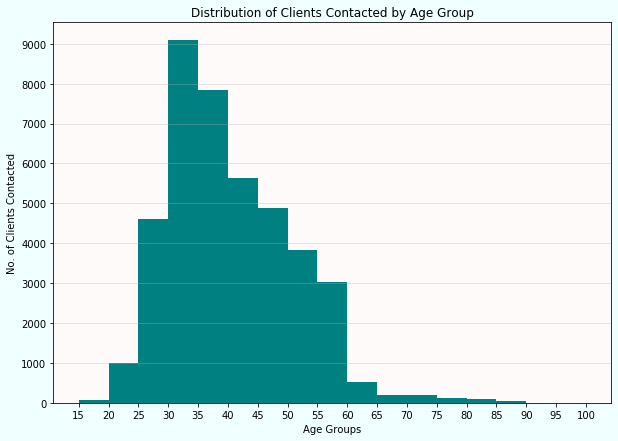

In [6]:
#Distribution of ages

ages = list(client_data.age)
min_age = min(ages)
max_age = max(ages)
print(min_age, max_age)

fig = plt.figure(figsize=[10,7])
fig.patch.set_facecolor('azure')
ax = plt.subplot()
ax.set_facecolor('snow')
plt.hist(ages, bins=17, range=(15,100),color='teal')
ax.set_xticks(range(15,101,5))
ax.set_yticks(range(0,9500,1000))
plt.title('Distribution of Clients Contacted by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('No. of Clients Contacted')
plt.grid(True, axis='y',alpha=0.4)

plt.savefig('Dist. by Age Group.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

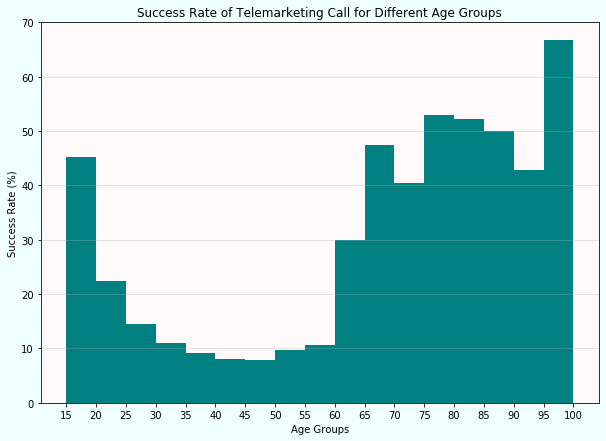

In [7]:
#What is the success rate of each age group
plt.close('all')

xticks = []
labels = []

for i in range(18):
    xticks.append(i-0.5)
    labels.append(str((i*5)+15))

success_rates = []

for i, j in zip(range(15,96,5),range(20,101,5)):
    age_group = client_data[(client_data.age >= i) & (client_data.age < j)]
    total_ag = age_group.age.count()
    total_yes = age_group[age_group.y == 'yes'].age.count()
    success_rate = round(100*total_yes/float(total_ag),1)
    success_rates.append(success_rate)
    
fig = plt.figure(figsize=[10,7])
fig.patch.set_facecolor('azure')
ax2 = plt.subplot()
ax2.set_facecolor('snow')
plt.bar(range(17),success_rates,1,color='teal')
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)
plt.title('Success Rate of Telemarketing Call for Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Success Rate (%)')
plt.grid(True, axis='y',alpha=0.4)

plt.savefig('SR by Age Group.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

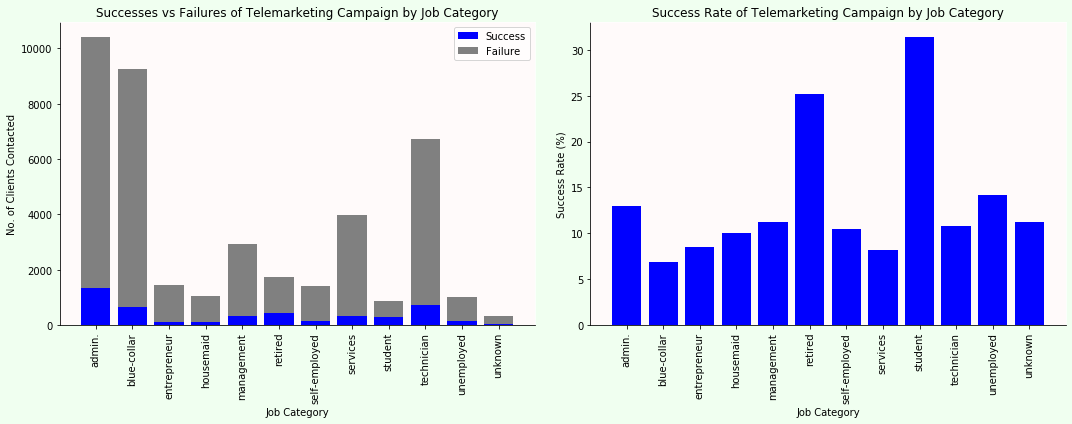

In [8]:
#Telemarketing Success by Job Category

plt.close('all')

success_count_df = client_data[client_data.y == 'yes'].groupby('job').cnt.count().reset_index()
success_counts = list(success_count_df.cnt)
failure_count_df = client_data[client_data.y == 'no'].groupby('job').cnt.count().reset_index()
failure_counts = list(failure_count_df.cnt)
labels = success_count_df.job.unique()

success_rates = [100*float(i)/(i+j) for i, j in zip(success_counts, failure_counts)]

fig = plt.figure(figsize=[15,6])
fig.patch.set_facecolor('honeydew')
ax = plt.subplot(1,2,1)
ax.set_facecolor('snow')
plt.bar(range(len(labels)), success_counts, color='blue')
plt.bar(range(len(labels)), failure_counts, color='grey',bottom=success_counts)
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels,rotation=90)
plt.legend(['Success','Failure'])
plt.xlabel('Job Category')
plt.ylabel('No. of Clients Contacted')
plt.title('Successes vs Failures of Telemarketing Campaign by Job Category')

ax2 = plt.subplot(1,2,2)
ax2.set_facecolor('snow')
plt.bar(range(len(labels)), success_rates,color='blue')
ax2.spines['top'].set_color('#FFFFFF')
ax2.spines['right'].set_color('#FFFFFF')
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels(labels,rotation=90)
plt.xlabel('Job Category')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate of Telemarketing Campaign by Job Category')

plt.tight_layout()
plt.savefig('SF & SR by Job Category.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

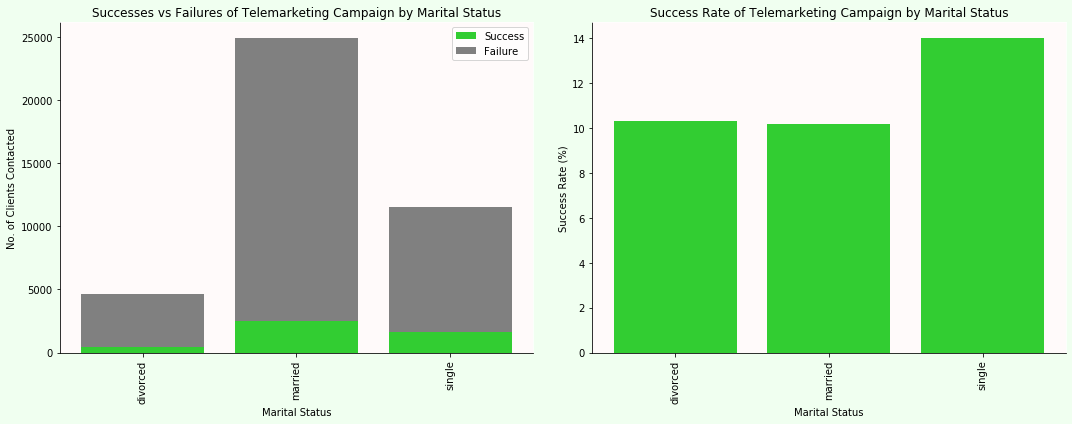

In [9]:
#Telemarketing Success by Marital Status

plt.close('all')

success_count_df2 = client_data[(client_data.marital != 'unknown') & (client_data.y == 'yes')].groupby('marital').cnt.count().reset_index()
success_counts2 = list(success_count_df2.cnt)
failure_count_df2 = client_data[(client_data.marital != 'unknown') & (client_data.y == 'no')].groupby('marital').cnt.count().reset_index()
failure_counts2 = list(failure_count_df2.cnt)
labels2 = list(success_count_df2.marital)
success_rates2 = [100*float(i)/(i+j) for i, j in zip(success_counts2, failure_counts2)]

fig = plt.figure(figsize=[15,6])
fig.patch.set_facecolor('honeydew')
ax = plt.subplot(1,2,1)
ax.set_facecolor('snow')
plt.bar(range(len(labels2)), success_counts2,color='limegreen')
plt.bar(range(len(labels2)), failure_counts2,color='grey',bottom=success_counts2)
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
ax.set_xticks(range(len(labels2)))
ax.set_xticklabels(labels2,rotation=90)
plt.legend(['Success','Failure'])
plt.xlabel('Marital Status')
plt.ylabel('No. of Clients Contacted')
plt.title('Successes vs Failures of Telemarketing Campaign by Marital Status')

ax2 = plt.subplot(1,2,2)
ax2.set_facecolor('snow')
plt.bar(range(len(labels2)), success_rates2,color='limegreen')
ax2.spines['top'].set_color('#FFFFFF')
ax2.spines['right'].set_color('#FFFFFF')
ax2.set_xticks(range(len(labels2)))
ax2.set_xticklabels(labels2,rotation=90)
plt.xlabel('Marital Status')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate of Telemarketing Campaign by Marital Status')

plt.tight_layout()
plt.savefig('SF & SR by Marital Status.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

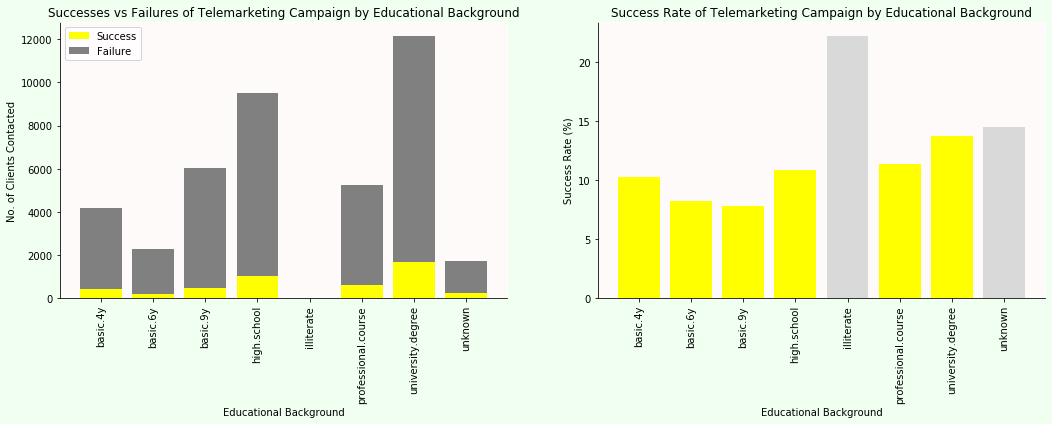

In [10]:
#Telemarketing Success by Educational Background

plt.close('all')

success_count_df3 = client_data[(client_data.y == 'yes')].groupby('education').cnt.count().reset_index()
success_counts3 = list(success_count_df3.cnt)
failure_count_df3 = client_data[(client_data.y == 'no')].groupby('education').cnt.count().reset_index()
failure_counts3 = list(failure_count_df3.cnt)

labels3 = success_count_df3.education.unique()

success_rates3 = [100*float(i)/(i+j) for i, j in zip(success_counts3, failure_counts3)]

fig=plt.figure(figsize=[15,6])
fig.patch.set_facecolor('honeydew')
ax = plt.subplot(1,2,1)
ax.set_facecolor('snow')
plt.bar(range(len(labels3)), success_counts3,color='yellow')
plt.bar(range(len(labels3)), failure_counts3,color='grey',bottom=success_counts3)
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
ax.set_xticks(range(len(labels3)))
ax.set_xticklabels(labels3,rotation=90)
plt.legend(['Success','Failure'])
plt.xlabel('Educational Background')
plt.ylabel('No. of Clients Contacted')
plt.title('Successes vs Failures of Telemarketing Campaign by Educational Background')

ax2 = plt.subplot(1,2,2)
ax2.set_facecolor('snow')
plt.bar(range(len(labels3)), success_rates3,color=['yellow' if i < 14 else '#d9d9d9' for i in success_rates3])
ax2.spines['top'].set_color('#FFFFFF')
ax2.spines['right'].set_color('#FFFFFF')
ax2.set_xticks(range(len(labels3)))
ax2.set_xticklabels(labels3,rotation=90)
plt.xlabel('Educational Background')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate of Telemarketing Campaign by Educational Background')

plt.tight_layout()
plt.savefig('SF & SR by Educational Background', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

[1704, 1367, 867, 414, 288] [29680, 5318, 1075, 302, 173] [5.0, 20.0, 45.0, 58.0, 62.0]


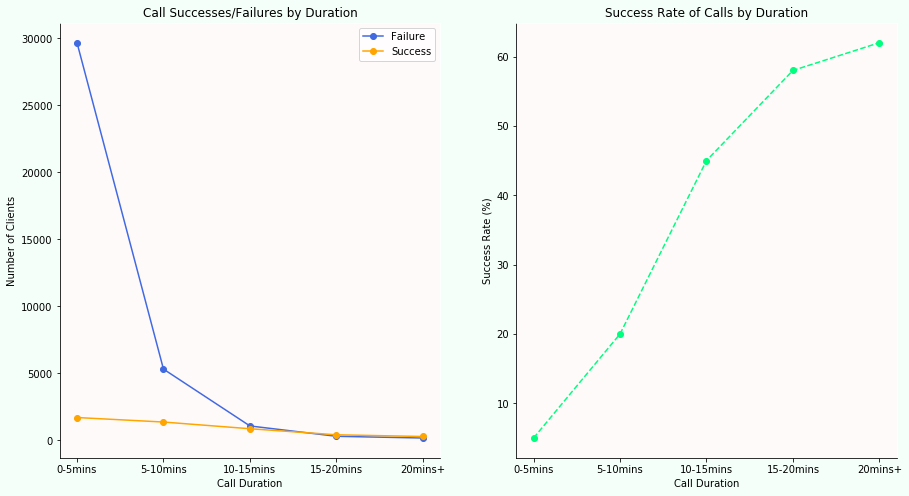

In [11]:
df['duration_m'] = round(df.duration / 60)
duration_counts = df.groupby('duration_m').cnt.count()
duration_counts_n = df[df.y == 'no'].groupby('duration_m').cnt.count().reset_index()
duration_counts_y = df[df.y == 'yes'].groupby('duration_m').cnt.count().reset_index()

#print(duration_counts_n)

dcn_0_5 = duration_counts_n[duration_counts_n.duration_m <= 5].cnt.sum()
dcn_5_10 = duration_counts_n[(duration_counts_n.duration_m <= 10) & (duration_counts_n.duration_m > 5)].cnt.sum()
dcn_10_15 = duration_counts_n[(duration_counts_n.duration_m <= 15) & (duration_counts_n.duration_m > 10)].cnt.sum()
dcn_15_20 = duration_counts_n[(duration_counts_n.duration_m <= 20) & (duration_counts_n.duration_m > 15)].cnt.sum()
dcn_20plus = duration_counts_n[(duration_counts_n.duration_m > 20)].cnt.sum()
dcn_list = [dcn_0_5,dcn_5_10,dcn_10_15,dcn_15_20,dcn_20plus]

dcy_0_5 = duration_counts_y[duration_counts_y.duration_m <= 5].cnt.sum()
dcy_5_10 = duration_counts_y[(duration_counts_y.duration_m <= 10) & (duration_counts_y.duration_m > 5)].cnt.sum()
dcy_10_15 = duration_counts_y[(duration_counts_y.duration_m <= 15) & (duration_counts_y.duration_m > 10)].cnt.sum()
dcy_15_20 = duration_counts_y[(duration_counts_y.duration_m <= 20) & (duration_counts_y.duration_m > 15)].cnt.sum()
dcy_20plus = duration_counts_y[(duration_counts_y.duration_m > 20)].cnt.sum()
dcy_list = [dcy_0_5,dcy_5_10,dcy_10_15,dcy_15_20,dcy_20plus]

dc_success_rate = [round(i*100 / float(i+j)) for i, j in zip(dcy_list, dcn_list)]

print(dcy_list,dcn_list,dc_success_rate)

duration_labels = ['0-5mins','5-10mins','10-15mins','15-20mins','20mins+']

fig = plt.figure(figsize=[15,8])
fig.patch.set_facecolor('mintcream')
ax = plt.subplot(1,2,1)
ax.set_facecolor('snow')
plt.plot(range(5),dcn_list,marker='o',color='royalblue')
plt.plot(range(5),dcy_list,marker='o',color='orange')
plt.title('Call Successes/Failures by Duration')
plt.xlabel('Call Duration')
plt.ylabel('Number of Clients')
plt.legend(['Failure','Success'])
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
ax.set_xticks(range(5))
ax.set_xticklabels(duration_labels)

ax2 = plt.subplot(1,2,2)
ax2.set_facecolor('snow')
plt.plot(range(5),dc_success_rate,marker='o',linestyle='dashed',color='springgreen')
plt.title('Success Rate of Calls by Duration')
plt.xlabel('Call Duration')
plt.ylabel('Success Rate (%)')
ax2.spines['top'].set_color('#FFFFFF')
ax2.spines['right'].set_color('#FFFFFF')
ax2.set_xticks(range(5))
ax2.set_xticklabels(duration_labels)

plt.savefig('SF & SR by Duration.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()